In [33]:
%load_ext autoreload
%autoreload 2

from msr.data.raw.ptbxl import load_ptbxl_raw_tensors_for_split, RAW_TENSORS_DATA_PATH
from msr.signals.representation_extractor import PeriodicRepresentationExtractor
import numpy as np
import torch
from msr.data.measurements import PtbXLMeasurement
import matplotlib.pyplot as plt

idx = 1126
target = "diagnostic_class"

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [2]:
data = torch.load(RAW_TENSORS_DATA_PATH / "train.pt")
sample = data[idx]
m = PtbXLMeasurement(sample.T, fs=100)

In [5]:
m.set_beats(source_channel="ecg_2")
m.set_agg_beat()
m.set_windows(win_len_s=6, step_s=2)

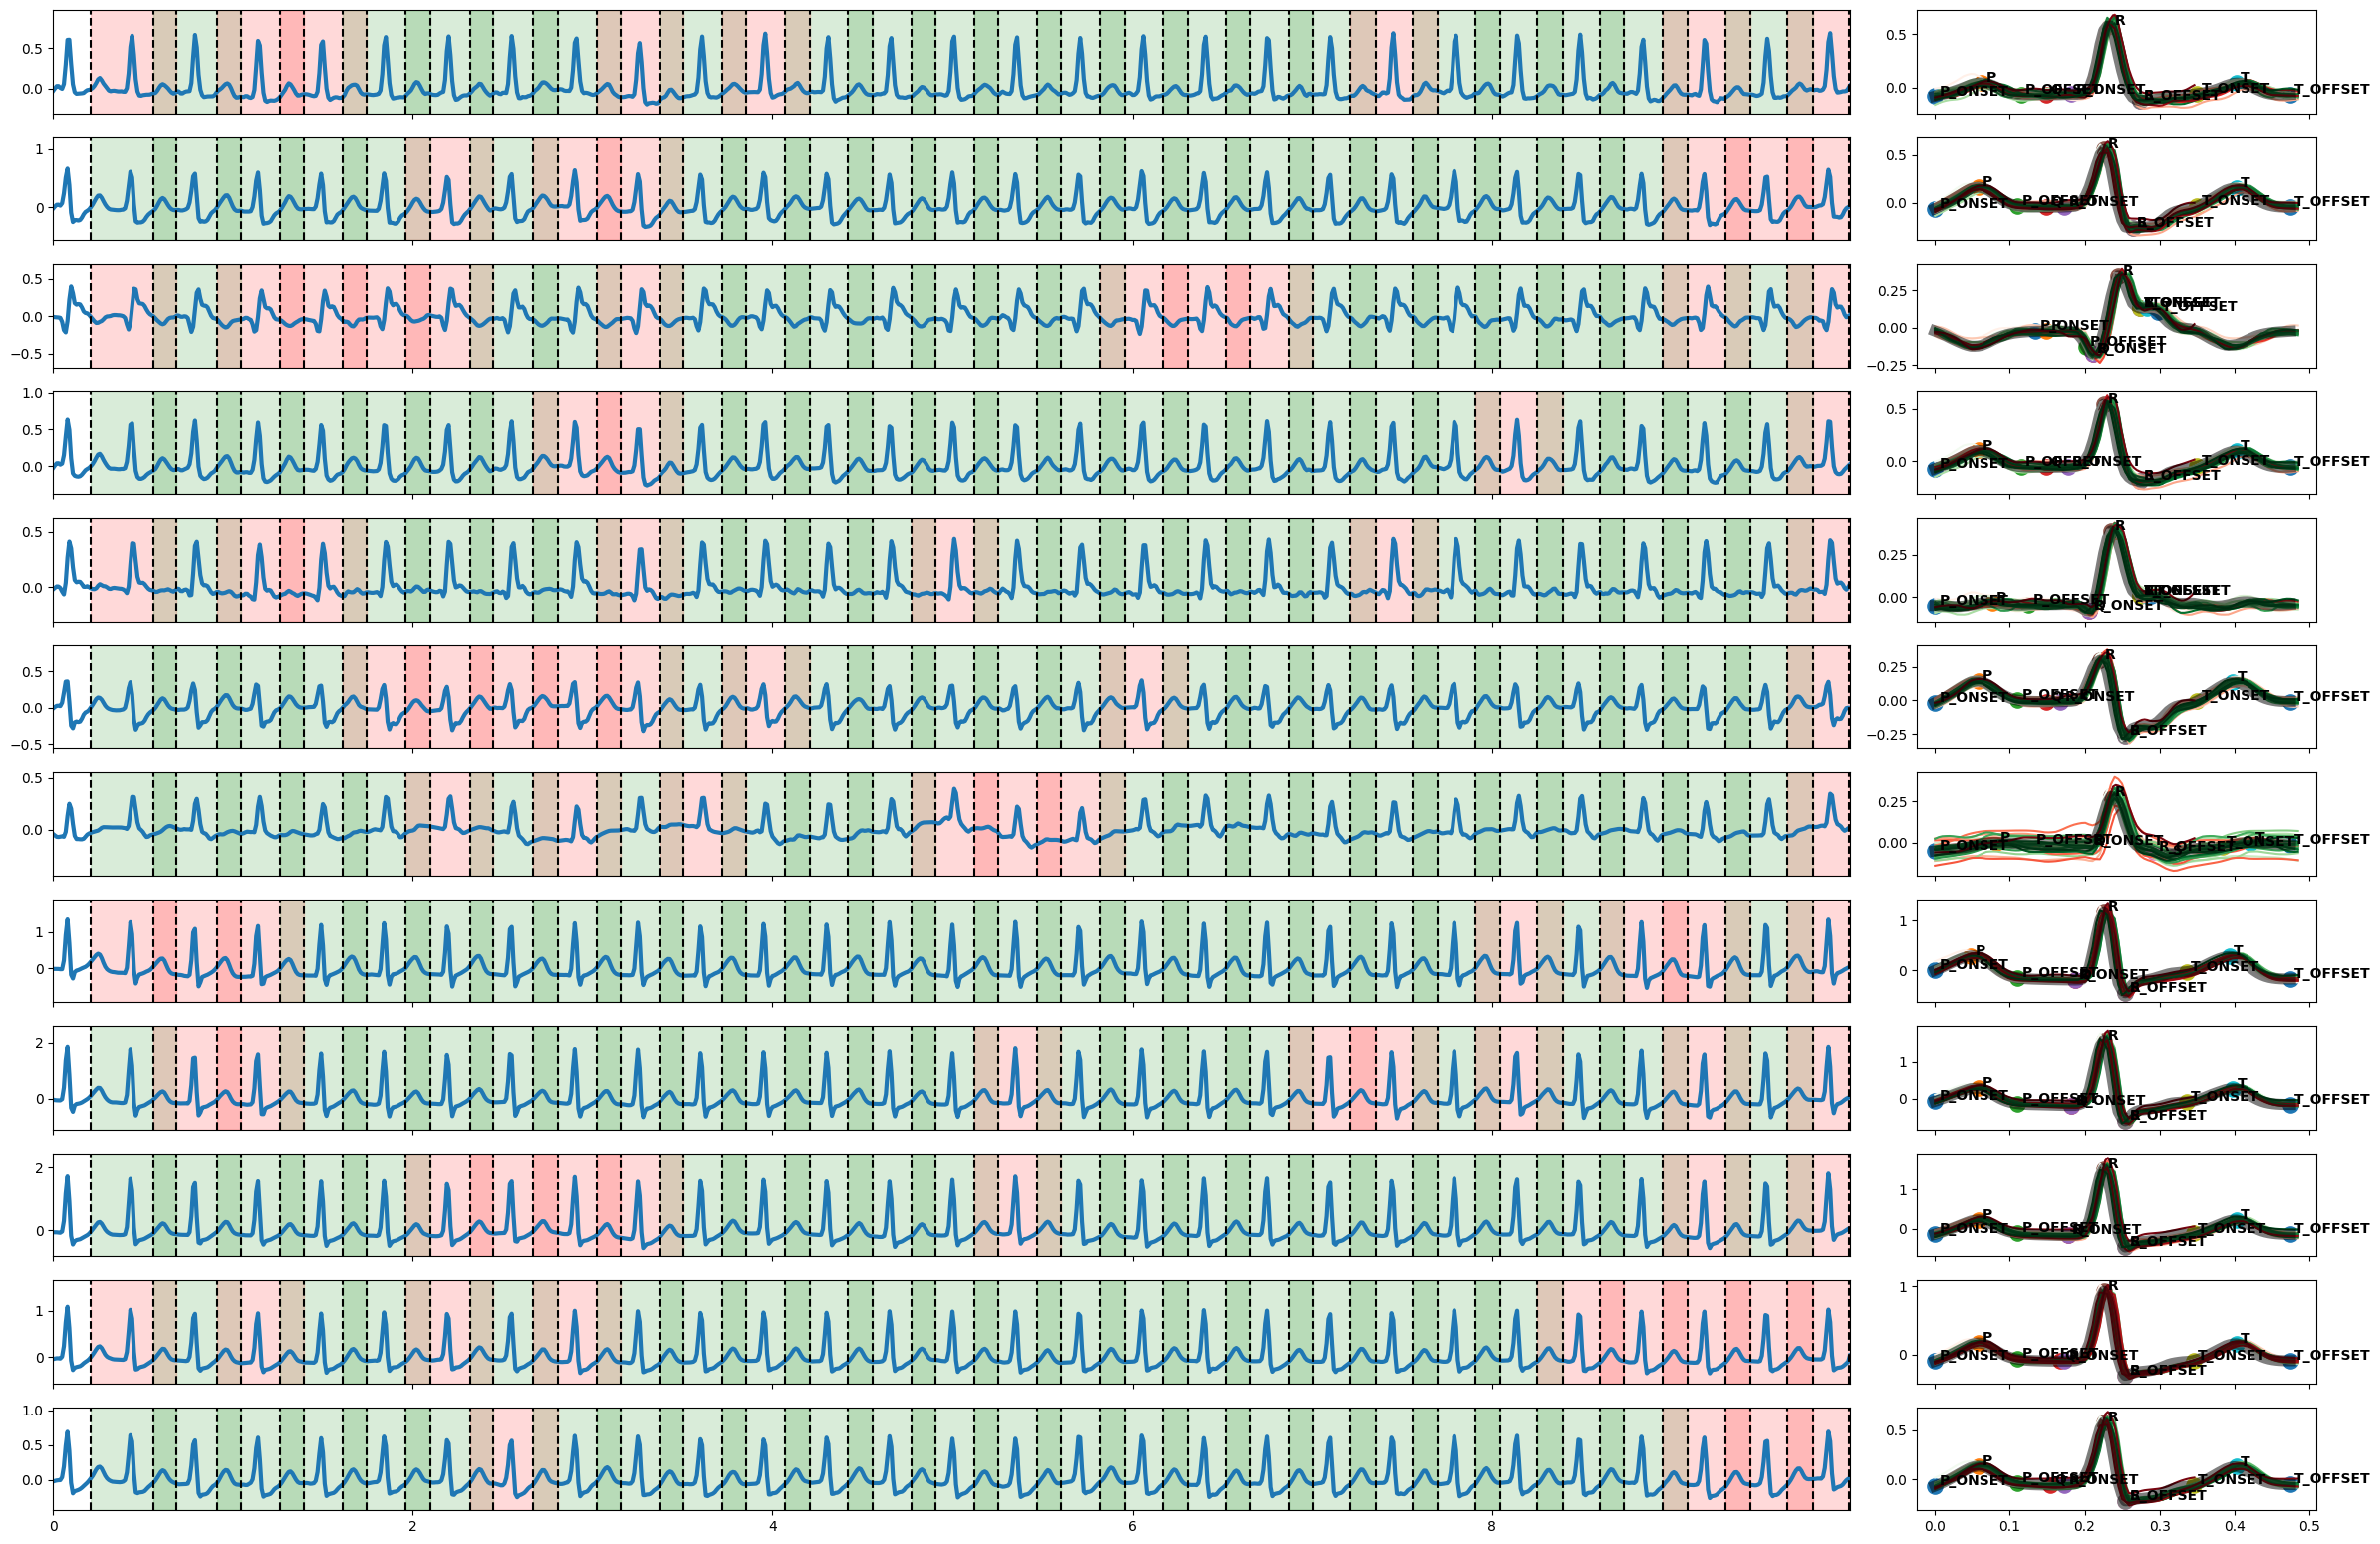

In [76]:
m.plot_beats_segmentation()

In [3]:
from msr.data.raw.ptbxl import RAW_TENSORS_DATA_PATH, DATASET_PATH
from msr.data.representation.ptbxl import get_ptbxl_representation
from msr.data.representation.utils import create_representations_dataset

from functools import partial

In [7]:
get_repr_func = partial(
    get_ptbxl_representation,
    representation_types=["beats_waveforms"],
    beats_params=dict(source_channel='ecg_2'),
    n_beats=7,
    agg_beat_params={},
    windows_params=dict(win_len_s=6, step_s=2),
    fs=100,
)

reps = create_representations_dataset(
    raw_tensors_path=RAW_TENSORS_DATA_PATH,
    representations_path=DATASET_PATH / f"representations_100",
    get_repr_func=get_repr_func,
)

A Jupyter Widget

A Jupyter Widget

/home/shate/.cache/pypoetry/virtualenvs/msr-xbuxOujG-py3.8/lib/python3.8/site-packages/numpy/core/fromnumeric.py:3432: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/home/shate/.cache/pypoetry/virtualenvs/msr-xbuxOujG-py3.8/lib/python3.8/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/home/shate/.cache/pypoetry/virtualenvs/msr-xbuxOujG-py3.8/lib/python3.8/site-packages/neurokit2/signal/signal_period.py:68: NeuroKitWarning: Too few peaks detected to compute the rate. Returning empty vector.
  warn(


Number of beats indicates that HR bounds werent met. Trying another channel
Original source channel was corrupted. Found new source channel: ecg_1
